## Capstone Project 

# The Battle of the Neighborhoods
Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

### 1.1. Overview 

Düsseldorf  is the capital and second-largest city of the most populous German federal state of North Rhine-Westphalia after Cologne, as well as the seventh-largest city in Germany with a population of 617,280. Mercer's 2012 Quality of Living survey ranked Düsseldorf the sixth most livable city in the world. 
 Düsseldorf is an international business and financial centre, renowned for its fashion and trade fairs and is headquarters to one Fortune Global 500 and two DAX companies. Messe Düsseldorf organises nearly one fifth of premier trade shows.

The Rhine Metropolis is one of the most diverse areas in terms of culinary diversity. Düsseldorf, with the third largest Japanese community in Europe, not only provides a wide range of culinary cuisine but also has a solid foundation of Authentic Asian food in the city. Düsseldorf's exceptional culinary cuisine has been recognized and visited by the Worldwide leading travel guide of Lonely Planet. Along with a broad range of diverse cultural cuisine, Düsseldorf is also home to various Michelin starred restaurants that are world renowned


### 1.2. Opportunities and challenges 


Our stakeholder are really into opening a restaurant  in Duesseldorf because of the current and potential opportunities:
- this is one of the biggest and the most liveable cities in Germany. 
- it is also the central of cuisine, and the duesseldorf's locals and suburban, as well as the visitors are keen on the diverse cultural cuisine here. 
- the locals' income is also high. it is a favourable condition for establishing a business relating to service area as restaurant. 

Of course, choosing a location for the restaurant is one of the stressful and controversial tasks, since there are a lot of challenges realting to 
- the number of potential competitors
-  the number of of alternatives
- the population 
- the parking lot numbers

### 1.3. Objectives

This project conduct an analysis in order to find out the optimal place to build up a cuisine restaurant based on the mentioned attributes.  In fact there are many determinants but because of the limitation of time and the  course requirements, thus the project just focuses on the main ones. 


## 2. Data <a name="data"></a>

### 2.1 Data description

Based on criteria listed above the following data will be utilized in our analysis:
- the number of restaurants within the certain radius of each borough (Foresquare API)
- the number of parks within the certain radius of each borough (Foresquare API)
- the population density in each borough. 


- the population and the population density of the borough. https://www.citypopulation.de/de/germany/dusseldorf/admin/
Source: citypopulation.de 
- the square of Duesseldorf's Districts
https://www.duesseldorf.de/bv/?L=0
Source: Official Website of Dusseldorf city
- the coordinates of the borough. 
https://latitude.to/articles-by-country/de/germany/210179/dusseldorf
Source: latitude to 

### 2.2 Data Preparation

Import the necessary Libraries

In [101]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Load the coordinates of the boroughs into a dataframe.

In [103]:
df = pd.read_csv('Duesseldorf_Population.csv')
df = df[['Borough', 'Population', ' Population Density ',
       'Latitude', 'Longitude']]
print(df.shape)
df.head(10)

(39, 5)


,Borough,Population,Population Density,Latitude,Longitude
0,Altstadt,2404,7603.008850,51.223999,6.770830
1,Angermund,6626,678.516775,51.324665,6.774664
2,Bilk,40651,4838.669355,51.201499,6.774497
3,Carlstadt,2285,7603.008850,51.220332,6.769330
4,Derendorf,20610,7603.008850,51.239666,6.788830
5,Düsseltal,28177,8899.580420,51.237832,6.801997
6,Eller,31701,2894.265403,51.199999,6.838330
7,Flehe,2726,4838.669355,51.188833,6.768164
8,Friedrichstadt,19883,4838.669355,51.207333,6.775164
9,Garath,19109,4470.661896,51.141333,6.890163


Use geopy library to get the Geolocation Cordinates of Duesseldorf city.

In [104]:
address = 'Duesseldorf'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Duesseldorf are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Duesseldorf are 51.2254018, 6.7763137.


 Define Foursquare Credentials and Version

In [105]:
CLIENT_ID = '3I22FVMIBODABLJYTYNYTU3NCFN2C4DPXSS1MFIO42MY4B2A' # your Foursquare ID
CLIENT_SECRET = 'RGKOTFDPW0ERARMJEWT20ULIIH3XGIIA3E5V0WVFTD51EB0Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3I22FVMIBODABLJYTYNYTU3NCFN2C4DPXSS1MFIO42MY4B2A
CLIENT_SECRET:RGKOTFDPW0ERARMJEWT20ULIIH3XGIIA3E5V0WVFTD51EB0Q


Create a function to repeat the process of exploring the venues for all the neighborhoods in Duesseldorf

In [106]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe called duesseldorf_venues

In [107]:
LIMIT = 100
radius = 1000
duesseldorf_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                   radius = radius
                                  )

Altstadt
Angermund
Bilk
Carlstadt
Derendorf
Düsseltal
Eller
Flehe
Friedrichstadt
Garath
Gerresheim
Golzheim
Grafenberg
Hamm
Hassels
Heerdt
Hellerhof
Himmelgeist
Holthausen
Hubbelrath
Itter
Kalkum
Lichtenbroich
Lierenfeld
Lohausen
Lörick
Ludenberg
Mörsenbroich
Niederkassel
Oberbilk
Pempelfort
Rath
Reisholz
Stadtmitte
Stockum
Unterbach
Unterbilk
Unterrath
Vennhausen


In [108]:
print(duesseldorf_venues.shape)
duesseldorf_venues.head()

(1486, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt,51.223999,6.77083,Rheinuferpromenade,51.225275,6.770204,Pedestrian Plaza
1,Altstadt,51.223999,6.77083,Carlsplatz,51.223429,6.773586,Plaza
2,Altstadt,51.223999,6.77083,Markt am Carlsplatz,51.223685,6.773209,Market
3,Altstadt,51.223999,6.77083,YOMARO Frozen Yogurt,51.223110,6.773122,Frozen Yogurt Shop
4,Altstadt,51.223999,6.77083,Rösterei VIER,51.224536,6.773703,Coffee Shop


In [109]:
duesseldorf_venues['Venue Category'].value_counts()

Supermarket                      91
Italian Restaurant               73
Hotel                            72
Café                             61
Bakery                           61
Restaurant                       36
Ice Cream Shop                   32
Pizza Place                      31
German Restaurant                31
Bar                              31
Park                             30
Drugstore                        29
Coffee Shop                      29
Greek Restaurant                 26
Trattoria/Osteria                22
Brewery                          19
Pub                              19
Plaza                            18
Cocktail Bar                     18
Gastropub                        17
Bus Stop                         17
Gym / Fitness Center             17
Thai Restaurant                  17
Japanese Restaurant              15
BBQ Joint                        15
Sushi Restaurant                 15
Vietnamese Restaurant            14
Tram Station                

Let's check how many venues were returned for each neighborhood

In [110]:
duesseldorf_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Altstadt,100,100,100,100,100,100
Angermund,4,4,4,4,4,4
Bilk,63,63,63,63,63,63
Carlstadt,100,100,100,100,100,100
Derendorf,100,100,100,100,100,100
Düsseltal,100,100,100,100,100,100
Eller,8,8,8,8,8,8
Flehe,11,11,11,11,11,11
Friedrichstadt,100,100,100,100,100,100


In [111]:
duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Restaurant', regex=False))].count()

Borough              384
Borough Latitude     384
Borough Longitude    384
Venue                384
Venue Latitude       384
Venue Longitude      384
Venue Category       384
dtype: int64

In [112]:
duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Park', regex=False))].count()

Borough              35
Borough Latitude     35
Borough Longitude    35
Venue                35
Venue Latitude       35
Venue Longitude      35
Venue Category       35
dtype: int64

In [113]:
duesseldorf_restaurant = duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['Borough']).count()
duesseldorf_restaurant.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
duesseldorf_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
duesseldorf_restaurant.head()

,Number of restaurants
Borough,
Altstadt,19
Angermund,1
Bilk,14
Carlstadt,24
Derendorf,39


In [114]:
duesseldorf_park = duesseldorf_venues[(duesseldorf_venues['Venue Category'].str.contains('Park', regex=False))].groupby(['Borough']).count()
duesseldorf_park.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
duesseldorf_park.rename(columns = {'Venue Category':'Number of parks'}, inplace=True)
duesseldorf_park.head()

,Number of parks
Borough,
Altstadt,1
Bilk,3
Carlstadt,4
Derendorf,1
Düsseltal,3


In [115]:
# join above dataframe to the main df
df = df.join(duesseldorf_restaurant, on='Borough')
df = df.join(duesseldorf_park, on='Borough')

In [116]:
df.head(10)

,Borough,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
0,Altstadt,2404,7603.008850,51.223999,6.770830,19.0,1.0
1,Angermund,6626,678.516775,51.324665,6.774664,1.0,NaN
2,Bilk,40651,4838.669355,51.201499,6.774497,14.0,3.0
3,Carlstadt,2285,7603.008850,51.220332,6.769330,24.0,4.0
4,Derendorf,20610,7603.008850,51.239666,6.788830,39.0,1.0
5,Düsseltal,28177,8899.580420,51.237832,6.801997,27.0,3.0
6,Eller,31701,2894.265403,51.199999,6.838330,NaN,NaN
7,Flehe,2726,4838.669355,51.188833,6.768164,1.0,3.0
8,Friedrichstadt,19883,4838.669355,51.207333,6.775164,30.0,2.0
9,Garath,19109,4470.661896,51.141333,6.890163,NaN,NaN


In [118]:
df = df.fillna(0)
#df[['Number of restaurants', 'Number of beer restaurants']] = df[['Number of restaurants', 'Number of beer restaurants']].astype('int64')
df.head(10)

,Borough,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
0,Altstadt,2404,7603.008850,51.223999,6.770830,19.0,1.0
1,Angermund,6626,678.516775,51.324665,6.774664,1.0,0.0
2,Bilk,40651,4838.669355,51.201499,6.774497,14.0,3.0
3,Carlstadt,2285,7603.008850,51.220332,6.769330,24.0,4.0
4,Derendorf,20610,7603.008850,51.239666,6.788830,39.0,1.0
5,Düsseltal,28177,8899.580420,51.237832,6.801997,27.0,3.0
6,Eller,31701,2894.265403,51.199999,6.838330,0.0,0.0
7,Flehe,2726,4838.669355,51.188833,6.768164,1.0,3.0
8,Friedrichstadt,19883,4838.669355,51.207333,6.775164,30.0,2.0
9,Garath,19109,4470.661896,51.141333,6.890163,0.0,0.0


## 3. Methodology and Analysis <a name="methodology"></a>


After cleaning and preparing the data, let us identify the steps, that have to be performed in order to find the most optimal boroughs.
Firstly, we will apply some basic exploratory analysis to our data. For that let's find the location of each borough on the map. Then we can visually inspect some values in our data with the help of bar charts.
Secondly, we have the possibility to reduce the number features in data frame by replacing them with more reasonable data.
Finally, we will perform cluster analysis to find the best cluster of boroughs with meaningful features.


### 3.1 Exploratory Data Analysis

Let's first derive some basic statistical values of our data.

In [119]:
df.describe()

,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,13138.153846,3860.467043,51.220563,6.804561,9.846154,0.897436
std,10430.690926,2226.325238,0.042230,0.051867,12.160199,1.293605
min,1612.000000,678.516775,51.125999,6.709497,0.000000,0.000000
25%,5049.500000,2560.856519,51.200749,6.770497,1.000000,0.000000
50%,10598.000000,3415.128205,51.221332,6.788830,4.000000,0.000000
75%,19626.500000,4838.669355,51.247166,6.848413,14.000000,1.000000
max,40651.000000,8899.580420,51.324665,6.906496,41.000000,5.000000


It's also would be quite useful to visualize the center locations of each borough. For that, we need to create a map of Stuttgart with boroughs superimposed on top.

In [64]:
address = 'Duesseldorf'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Duesseldorf are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Duesseldorf are 51.2254018, 6.7763137.


In [120]:
# create map of Duesseldorf using latitude and longitude values
map_duesseldorf = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_duesseldorf)  
    
map_duesseldorf

Visualization. In our case barcharts will be utilized.

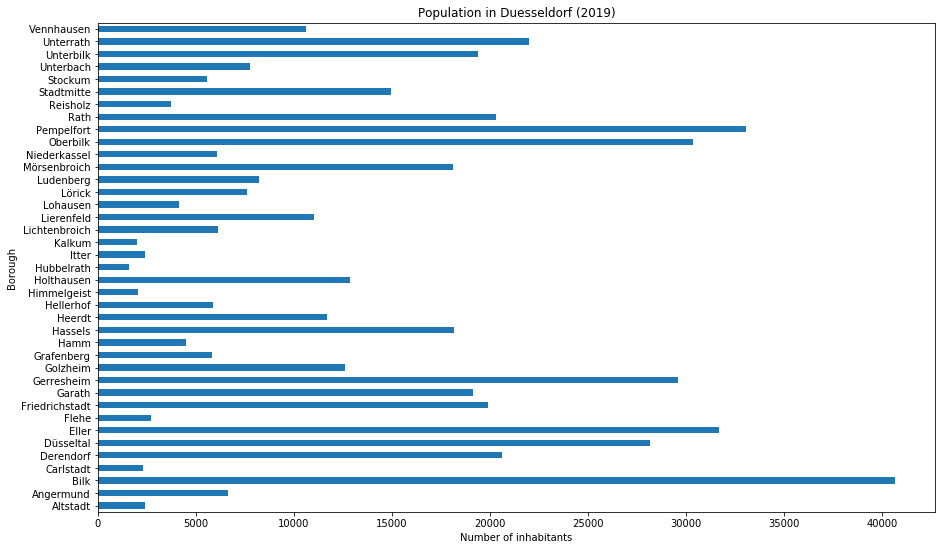

In [121]:
import matplotlib.pyplot as plt
# step 2: plot data
df[['Borough', 'Population']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population in Duesseldorf (2019)') # add title to the plot
plt.yticks (np.arange(39), df['Borough'])
plt.show()

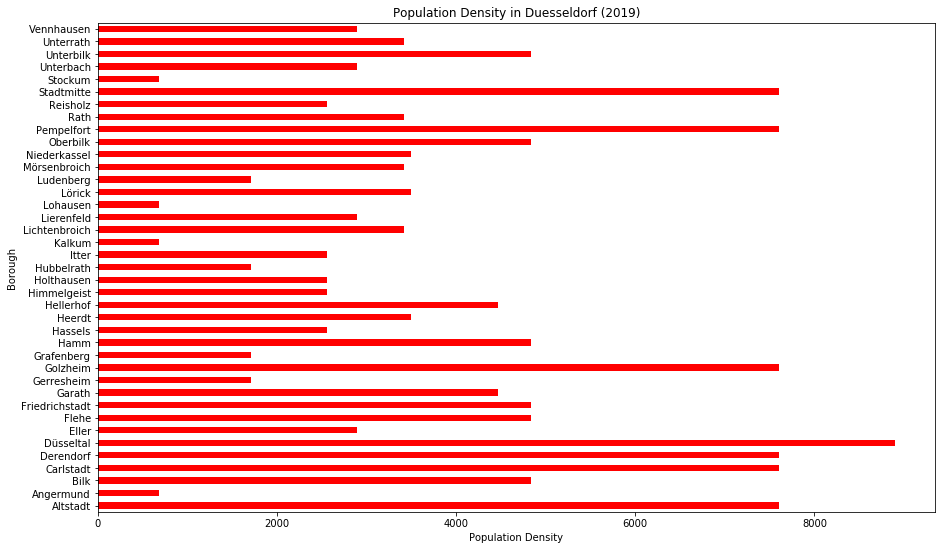

In [122]:
df[['Borough', ' Population Density ']].plot(kind='barh', figsize=(15, 9), legend = None,color='red')

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population Density in Duesseldorf (2019)') # add title to the plot
plt.yticks (np.arange(39), df['Borough'])
plt.show()

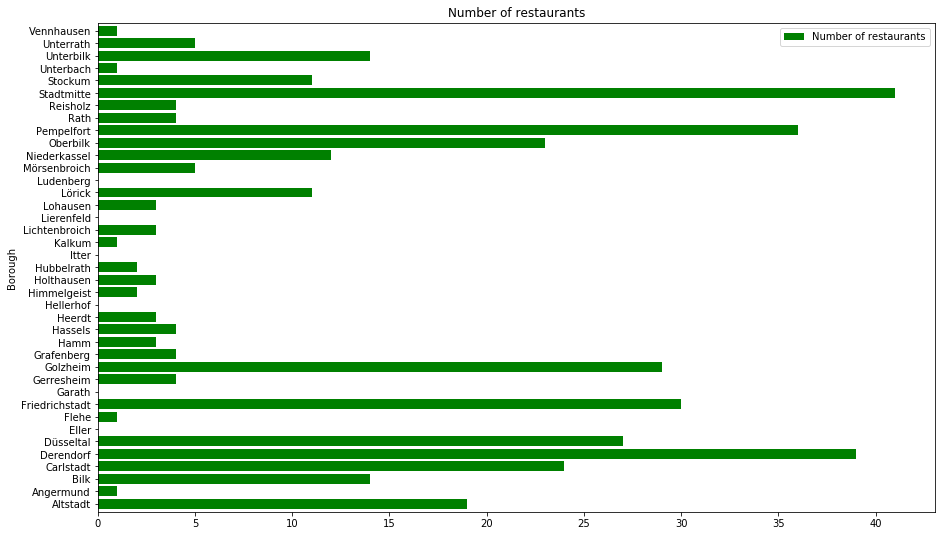

In [144]:
# step 2: plot data
# step 2: plot data
df[['Number of restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8, color = "green")

#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(39), df['Borough'])
plt.show()

### 3.2 Cluster Analysis

In order to identify groups (clusters) with similar characteristics, let's us apply the unsupervised learning method to our data, namely K-Means algorithm. But before that, we can reduce the number of features and remove columns "Population", "Number of restaurants". These three columns we can replace with two new ones, namely, "Number of restaurants per thousand people" and "Number of parks per thousand people".

In [125]:
#df.drop([13], inplace =True)
#df.reset_index(inplace-True)
df_clusters = df.drop(['Borough','Latitude', 'Longitude'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population']/1000)
df_clusters['Number of parks restaurants per 1000 people'] = df_clusters['Number of parks']/(df_clusters['Population']/1000)
#df_clusters['Net income per person'] = df_clusters['Net income per person']*(-1)
#df_clusters = df_clusters.drop(['Cluster Labels', 'Population', 'Number of restaurants', 'Number of beer restaurants'], axis = 1)
df_clusters = df_clusters.drop(['Population', 'Number of restaurants', 'Number of parks'], axis = 1)
df_clusters.head()#df.drop([13], inplace =True)
#df.reset_index(inplace-True)
df_clusters = df.drop(['Borough','Latitude', 'Longitude'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population']/1000)
#df_clusters['Net income per person'] = df_clusters['Net income per person']*(-1)
#df_clusters = df_clusters.drop(['Cluster Labels', 'Population', 'Number of restaurants', 'Number of beer restaurants'], axis = 1)
df_clusters = df_clusters.drop(['Population', 'Number of restaurants'], axis = 1)
df_clusters.head()

,Population Density,Number of parks,Number of restaurants per 1000 people
0,7603.008850,1.0,7.903494
1,678.516775,0.0,0.150921
2,4838.669355,3.0,0.344395
3,7603.008850,4.0,10.503282
4,7603.008850,1.0,1.892285


And of course, it is crucial, to perform normalization:

In [126]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[ 1.70301532,  0.08032193,  3.34190695],
       [-1.44792239, -0.70281691, -0.49298828],
       [ 0.44512356,  1.64659962, -0.39728407],
       [ 1.70301532,  2.42973847,  4.62792054],
       [ 1.70301532,  0.08032193,  0.36839679],
       [ 2.29301041,  1.64659962, -0.09364469],
       [-0.43966274, -0.70281691, -0.56764281],
       [ 0.44512356,  1.64659962, -0.38618245],
       [ 0.44512356,  0.86346078,  0.17871477],
       [ 0.27766455, -0.70281691, -0.56764281],
       [-0.98011975, -0.70281691, -0.50077189],
       [ 1.70301532,  3.21287732,  0.57113364],
       [-0.98011975, -0.70281691, -0.22796149],
       [ 0.44512356, -0.70281691, -0.23838104],
       [-0.59137793, -0.70281691, -0.45869266],
       [-0.16629044,  0.08032193, -0.44064385],
       [ 0.27766455, -0.70281691, -0.56764281],
       [-0.59137793,  0.08032193, -0.08855232],
       [-0.59137793, -0.70281691, -0.45210382],
       [-0.98011975, -0.70281691,  0.04608043],
       [-0.59137793,  0.08032193, -0.567

To identify the optimal number of clusters, the Elbow method is used:

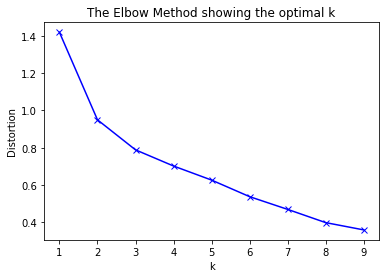

In [127]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the graph, we can see that 2 clusters are reasonable:

In [132]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:39] 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

Let's insert the Cluster labels into our master dataframe.

In [133]:
#df = df.drop('Cluster Labels', axis = 1)
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head()

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
0,1,Altstadt,2404,7603.008850,51.223999,6.770830,19.0,1.0
1,0,Angermund,6626,678.516775,51.324665,6.774664,1.0,0.0
2,1,Bilk,40651,4838.669355,51.201499,6.774497,14.0,3.0
3,1,Carlstadt,2285,7603.008850,51.220332,6.769330,24.0,4.0
4,1,Derendorf,20610,7603.008850,51.239666,6.788830,39.0,1.0


Now, it's time to create maps representing our clusters. The first map is illustrating the clusters where the radius of the Circle marker is proportional to a Number of restaurants per 1000 people in each borough.

In [134]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Cluster Labels'], df_clusters[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

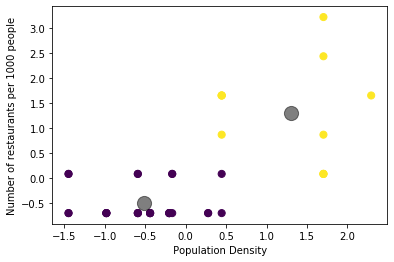

In [135]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel(' Population Density ')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

It is clearyly that there is a high concentration of restaurant in low population density. Conversely, in high population density the concentration of restaurant decreases.
Additionally there is a positve correlation between number of restaurants and Populaton Density

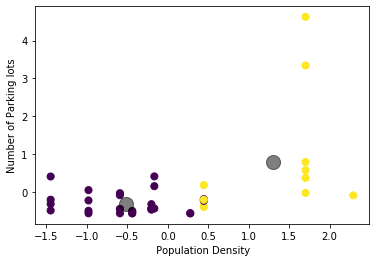

In [150]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel(' Population Density')
plt.ylabel('Number of Parking lots')
plt.show()

In [138]:
df[(df['Cluster Labels'] == 0)]

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
1,0,Angermund,6626,678.516775,51.324665,6.774664,1.0,0.0
6,0,Eller,31701,2894.265403,51.199999,6.838330,0.0,0.0
9,0,Garath,19109,4470.661896,51.141333,6.890163,0.0,0.0
10,0,Gerresheim,29589,1706.558559,51.236999,6.859663,4.0,0.0
12,0,Grafenberg,5825,1706.558559,51.174166,6.870997,4.0,0.0
13,0,Hamm,4507,4838.669355,51.202999,6.739997,3.0,0.0
14,0,Hassels,18161,2560.856519,51.174166,6.870997,4.0,0.0
15,0,Heerdt,11685,3495.027624,51.223666,6.709497,3.0,1.0
16,0,Hellerhof,5882,4470.661896,51.125999,6.903830,0.0,0.0
17,0,Himmelgeist,2065,2560.856519,51.170499,6.805997,2.0,1.0


In [139]:
df[(df['Cluster Labels'] == 1)]

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Number of restaurants,Number of parks
0,1,Altstadt,2404,7603.008850,51.223999,6.770830,19.0,1.0
2,1,Bilk,40651,4838.669355,51.201499,6.774497,14.0,3.0
3,1,Carlstadt,2285,7603.008850,51.220332,6.769330,24.0,4.0
4,1,Derendorf,20610,7603.008850,51.239666,6.788830,39.0,1.0
5,1,Düsseltal,28177,8899.580420,51.237832,6.801997,27.0,3.0
7,1,Flehe,2726,4838.669355,51.188833,6.768164,1.0,3.0
8,1,Friedrichstadt,19883,4838.669355,51.207333,6.775164,30.0,2.0
11,1,Golzheim,12597,7603.008850,51.239332,6.770164,29.0,5.0
30,1,Pempelfort,33064,7603.008850,51.236166,6.785497,36.0,2.0
33,1,Stadtmitte,14954,7603.008850,51.221332,6.785497,41.0,1.0


## 4. Results and discussion <a name="results"></a>

During the analysis, two clusters were defined. Two groups were clustered according to the Population Density. It is obvious, that the cluster with highest population density has the highest priority for us (Cluster 1).
Duesseldor Pempelfort and Duesseldorf Flehe are the most attractive options in terms of low competitiveness (low number of current restaurants) and high customer number(high population density). 
What could be done better?
Foursquare doesn't represent the full picture, since many venues are not on the list. For that reason, another maps could be utilized such as Google map or Openstreet map.
Boroughs have too complex geometry, thus defining the closest venues within the certain radius brings additional error to our analysis.

## 5. Conclusion <a name="conclusion"></a>


To conclude, the basic data analysis was performed to identify the most optimal boroughs for the placement of the restaurant in the city of Duesseldorf. During the analysis, several important statistical features of the boroughs were explored and visualized. Furthermore, clustering helped to highlight the group of optimal areas. Finally,Duesseldor Pempelfort and Duesseldorf Flehe were chosen as the most attractive options for the further analysis. 